In [2]:
# Importing modules and packages

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as pd
import pandas as pd



In [17]:
import os 

# Using assert to check that paths exist on computer.
assert os.path.isdir('data/')
assert os.path.isfile('data/lifeexp.xlsx')
assert os.path.isfile('data/alconsp.xlsx')

# Print everything in data
os.listdir('data/')

['alconsp.xlsx', 'lifeexp.xlsx']

In [52]:
# Creating and renaming columns in dataset in a dictionary


# Reading in Excelfile from our world in data
lifeexp = pd.read_excel('data/lifeexp.xlsx')
(lifeexp).head(5)


,Entity,Code,Year,Life expectancy - Sex: female - Age: at birth - Variant: estimates,Life expectancy - Sex: male - Age: at birth - Variant: estimates,Population,Continent,ratio
0,Afghanistan,AFG,2016,65.1,61.2,3.463621e+07,NaN,1.063725
1,Africa (UN),NaN,2016,63.4,59.8,1.232112e+09,NaN,1.060201
2,Albania,ALB,2016,81.4,76.6,2.881064e+06,NaN,1.062663
3,Algeria,DZA,2016,76.8,74.7,4.033933e+07,NaN,1.028112
4,American Samoa,ASM,2016,75.0,70.0,5.046800e+04,NaN,1.071429


In [36]:
lifeexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 7 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Entity                                                              246 non-null    object 
 1   Code                                                                237 non-null    object 
 2   Year                                                                246 non-null    float64
 3   Life expectancy - Sex: female - Age: at birth - Variant: estimates  246 non-null    float64
 4   Life expectancy - Sex: male - Age: at birth - Variant: estimates    255 non-null    float64
 5   Population                                                          245 non-null    float64
 6   ratio                                                               246 non-null    float64
dtypes: float64(5), obj

In [53]:
print(lifeexp.columns)

Index(['Entity', 'Code', 'Year',
       'Life expectancy - Sex: female - Age: at birth - Variant: estimates',
       'Life expectancy - Sex: male - Age: at birth - Variant: estimates',
       'Population ', 'Continent', 'ratio'],
      dtype='object')


In [54]:
lifeexp.drop(['Population ','Continent'], axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
lifeexp.head(5)

,Entity,Code,Year,Life expectancy - Sex: female - Age: at birth - Variant: estimates,Life expectancy - Sex: male - Age: at birth - Variant: estimates,ratio
0,Afghanistan,AFG,2016,65.1,61.2,1.063725
1,Africa (UN),NaN,2016,63.4,59.8,1.060201
2,Albania,ALB,2016,81.4,76.6,1.062663
3,Algeria,DZA,2016,76.8,74.7,1.028112
4,American Samoa,ASM,2016,75.0,70.0,1.071429


In [55]:
columns_dict={}
columns_dict['Entity'] = 'Country'
columns_dict['ratio'] = 'FM_ratio'
columns_dict['Life expectancy - Sex: female - Age: at birth - Variant: estimates']= 'Female_le'
columns_dict['Life expectancy - Sex: male - Age: at birth - Variant: estimates'] = 'Male_le'
lifeexp.rename(columns=columns_dict,inplace=True)
lifeexp.head(5)

,Country,Code,Year,Female_le,Male_le,FM_ratio
0,Afghanistan,AFG,2016,65.1,61.2,1.063725
1,Africa (UN),NaN,2016,63.4,59.8,1.060201
2,Albania,ALB,2016,81.4,76.6,1.062663
3,Algeria,DZA,2016,76.8,74.7,1.028112
4,American Samoa,ASM,2016,75.0,70.0,1.071429


In [56]:
lifeexp.dropna()

,Country,Code,Year,Female_le,Male_le,FM_ratio
0,Afghanistan,AFG,2016,65.1,61.2,1.063725
2,Albania,ALB,2016,81.4,76.6,1.062663
3,Algeria,DZA,2016,76.8,74.7,1.028112
4,American Samoa,ASM,2016,75.0,70.0,1.071429
5,Andorra,AND,2016,85.4,80.7,1.058240
...,...,...,...,...,...,...
250,Western Sahara,ESH,2016,71.6,68.0,1.052941
251,World,OWID_WRL,2016,74.7,69.6,1.073276
252,Yemen,YEM,2016,68.9,63.3,1.088468
253,Zambia,ZMB,2016,64.1,59.3,1.080944


In [100]:
lifeexp.drop(['Male_le','Female_le'],axis=1, inplace= True)



KeyError: "['Male_le', 'Female_le'] not found in axis"

In [103]:

lifeexp.head()
lifeexp.dropna()

,Country,Code,Year,FM_ratio
0,Afghanistan,AFG,2016,1.063725
2,Albania,ALB,2016,1.062663
3,Algeria,DZA,2016,1.028112
4,American Samoa,ASM,2016,1.071429
5,Andorra,AND,2016,1.058240
...,...,...,...,...
250,Western Sahara,ESH,2016,1.052941
251,World,OWID_WRL,2016,1.073276
252,Yemen,YEM,2016,1.088468
253,Zambia,ZMB,2016,1.080944


In [104]:
lifeexp.describe()

,Year,FM_ratio
count,255.0,255.000000
mean,2016.0,1.074934
std,0.0,0.028017
min,2016.0,1.007722
25%,2016.0,1.055785
50%,2016.0,1.072109
75%,2016.0,1.088951
max,2016.0,1.159226


In [37]:

# Reading in second excelfile from Our world in data
alconsp = pd.read_excel('data/alconsp.xlsx')
alconsp.head(5)

,Entity,Code,Year,"Indicator:Alcohol, consumers past 12 months (%) - Sex:Male","Indicator:Alcohol, consumers past 12 months (%) - Sex:Female",Population (historical estimates),Continent
0,Afghanistan,AFG,2016,1.0,0.3,34636212,NaN
1,Africa,NaN,2016,NaN,NaN,1232111820,NaN
2,Africa (UN),NaN,2016,NaN,NaN,1232111616,NaN
3,Albania,ALB,2016,65.0,37.6,2881064,NaN
4,Algeria,DZA,2016,4.8,1.5,40339328,NaN


In [38]:
print(alconsp.columns)

Index(['Entity', 'Code', 'Year',
       'Indicator:Alcohol, consumers past 12 months (%) - Sex:Male',
       'Indicator:Alcohol, consumers past 12 months (%) - Sex:Female',
       'Population (historical estimates)', 'Continent'],
      dtype='object')


In [39]:
columns_dict={}
columns_dict['Entity'] = 'Country'
columns_dict['Indicator:Alcohol, consumers past 12 months (%) - Sex:Male'] = 'Male_alc'
columns_dict['Indicator:Alcohol, consumers past 12 months (%) - Sex:Female']= 'Female_alc'
columns_dict['Population (historical estimates)'] = 'Population'
alconsp.rename(columns=columns_dict,inplace=True)


#alconsp.drop(['Population (historical estimates)','Continent'],axis=1,inplace=True)
alconsp.drop('Continent',axis=1,inplace=True)
alconsp.head(5)

,Country,Code,Year,Male_alc,Female_alc,Population
0,Afghanistan,AFG,2016,1.0,0.3,34636212
1,Africa,NaN,2016,NaN,NaN,1232111820
2,Africa (UN),NaN,2016,NaN,NaN,1232111616
3,Albania,ALB,2016,65.0,37.6,2881064
4,Algeria,DZA,2016,4.8,1.5,40339328


In [40]:
alconsp.head(5)

,Country,Code,Year,Male_alc,Female_alc,Population
0,Afghanistan,AFG,2016,1.0,0.3,34636212
1,Africa,NaN,2016,NaN,NaN,1232111820
2,Africa (UN),NaN,2016,NaN,NaN,1232111616
3,Albania,ALB,2016,65.0,37.6,2881064
4,Algeria,DZA,2016,4.8,1.5,40339328


In [48]:
import numpy as np
pop = alconsp.Population
np.array(pop)
# Format population numbers to display in millions
np_pop = np.array(pop) / 1000000
pop_labels = [f'{pop:.2f} million' for pop in np_pop]


In [31]:
alconsp.drop('Population',axis=1,inplace=True)
alconsp.head(5)

,Country,Code,Year,Male_alc,Female_alc
0,Afghanistan,AFG,2016,1.0,0.3
1,Africa,NaN,2016,NaN,NaN
2,Africa (UN),NaN,2016,NaN,NaN
3,Albania,ALB,2016,65.0,37.6
4,Algeria,DZA,2016,4.8,1.5


In [32]:
alconsp.dropna()


,Country,Code,Year,Male_alc,Female_alc
0,Afghanistan,AFG,2016,1.0,0.3
3,Albania,ALB,2016,65.0,37.6
4,Algeria,DZA,2016,4.8,1.5
6,Andorra,AND,2016,85.2,64.3
7,Angola,AGO,2016,61.6,34.3
...,...,...,...,...,...
247,Venezuela,VEN,2016,51.2,25.2
248,Vietnam,VNM,2016,50.0,23.9
252,Yemen,YEM,2016,1.1,0.3
253,Zambia,ZMB,2016,38.3,16.5


In [33]:
alconsp.drop(['Code','Year'], axis=1, inplace= True)

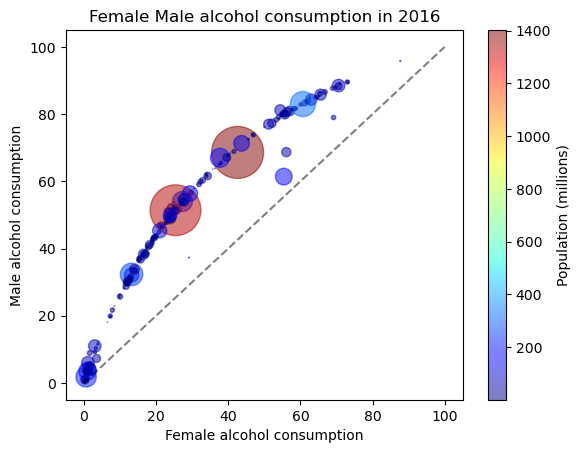

In [78]:
plt.scatter(alconsp['Female_alc'], alconsp['Male_alc'], s= np_pop,  alpha=0.5, c= np_pop, cmap = 'jet')

# Add axis labels
plt.xlabel('Female alcohol consumption')
plt.ylabel('Male alcohol consumption')
# Add colorbar legend
plt.colorbar(label='Population (millions)')


# Add title
plt.title('Female Male alcohol consumption in 2016')


# Add 45 degree line
plt.plot([0, 100], [0, 100], linestyle='--', color='black', alpha =0.5)

# After customizing, display the plot
plt.show()


In [94]:
alconsp.describe()

,Year,Male_alc,Female_alc
count,255.0,188.000000,188.000000
mean,2016.0,49.442021,29.347872
std,0.0,25.739223,21.317873
min,2016.0,0.200000,0.100000
25%,2016.0,31.400000,12.800000
50%,2016.0,49.250000,23.850000
75%,2016.0,69.500000,45.900000
max,2016.0,95.800000,87.700000


In [95]:
alconsp['FM_alc_ratio'] = alconsp['Female_alc']/alconsp['Male_alc']


In [96]:
alconsp.drop(['Male_alc','Female_alc'],axis=1, inplace= True)
alconsp.head()

,Country,Code,Year,FM_alc_ratio
0,Afghanistan,AFG,2016,0.300000
1,Africa,NaN,2016,NaN
2,Africa (UN),NaN,2016,NaN
3,Albania,ALB,2016,0.578462
4,Algeria,DZA,2016,0.312500


In [112]:
combined_df = pd.merge(lifeexp,alconsp, on= 'Country', how = 'inner')

combined_df.drop(['Code_x', 'Year_y', 'Code_y'], axis=1, inplace=True)
combined_df = combined_df.rename(columns= {'Year_x': 'Year'})
combined_df = combined_df.dropna()
combined_df.head(20)

,Country,Year,FM_ratio,FM_alc_ratio
0,Afghanistan,2016,1.063725,0.300000
2,Albania,2016,1.062663,0.578462
3,Algeria,2016,1.028112,0.312500
5,Andorra,2016,1.058240,0.754695
6,Angola,2016,1.080068,0.556818
8,Antigua and Barbuda,2016,1.068966,0.571205
9,Argentina,2016,1.093278,0.697121
10,Armenia,2016,1.136298,0.426316
13,Australia,2016,1.050743,0.799547
14,Austria,2016,1.060683,0.785633


In [113]:
print(combined_df)

         Country  Year  FM_ratio  FM_alc_ratio
0    Afghanistan  2016  1.063725      0.300000
2        Albania  2016  1.062663      0.578462
3        Algeria  2016  1.028112      0.312500
5        Andorra  2016  1.058240      0.754695
6         Angola  2016  1.080068      0.556818
..           ...   ...       ...           ...
239    Venezuela  2016  1.131268      0.492187
240      Vietnam  2016  1.138728      0.478000
244        Yemen  2016  1.088468      0.272727
245       Zambia  2016  1.080944      0.430809
246     Zimbabwe  2016  1.075862      0.389105

[188 rows x 4 columns]
